# 1. 분류모델 기초
## 1.1 사이킷런과 머신러닝

사이킷런 홈페이지
- https://scikit-learn.org/

사이킷런 치트 시트
- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

사이킷런 핵심 개발자의 깃허브
- https://github.com/amueller/odscon-2015

## 1.1.3 사이킷런의 의사결정나무 알고리즘 알아보기

https://scikit-learn.org/stable/modules/tree.html#classification

주피터 노트북 단축키
- 아래 셀과 합치기 : shift + m 
- 커서에서 셀 나누기 : shift + ctrl + - 
- 셀 다시 실행: ctrl +y
- 실행 취소: ctrl + z

In [3]:
from sklearn import tree
X = [[0, 0], [1, 1]]
# 정답 0과 1만 존재
Y = [0, 1]

In [4]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [6]:
# fit == 학습
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier()

In [9]:
# 예측값 1
clf.predict([[2,2]])

array([1])

In [10]:
# 비율 출력
clf.predict_proba([[2,2]])

array([[0., 1.]])

### iris data set

In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
# decision tree 숫자만 학습시킬 수 있음
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

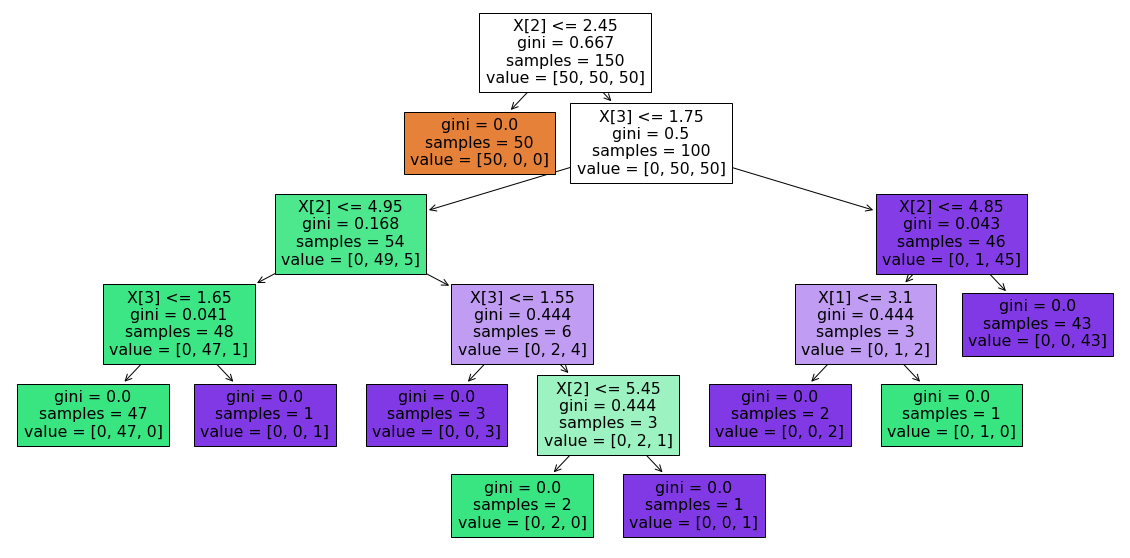

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
t = tree.plot_tree(clf, filled=True)

## 1.2 의사결정나무로 간단한 분류 예측 모델 만들기
### 1.2.1 당뇨병 데이터셋 소개


캐글에서 제공하고 있는 피마인디언 당뇨병 데이터

https://www.kaggle.com/uciml/pima-indians-diabetes-database

- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml) / *0은 결측치*
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

### 1.2.2 학습과 예측을 위한 데이터셋 만들기

### 1. 필요한 라이브러리 로드

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전 주피터 노트북 시각화 표시
# %matplotlib inline

### 2. 데이터셋 로드

In [4]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


전처리할 데이터 없다.
- 결측치, 문자가 섞여있으면 전처리가 필요하다

outcome이 예측할 데이터이다.

### 3. 학습 데이터셋 나누기

In [6]:
# 전체 데이터의 행에서 80% 위치에 해당하는 값을 splict_count 변수에 담는다.
split_count = int(df.shape[0]*0.8)
split_count

614

In [7]:
# 0 ~ 613행 명시적 복사
train = df[:split_count].copy()
train.shape

(614, 9)

### 4. 예측 데이터셋 나누기

In [8]:
test = df[split_count:].copy()
test.shape

(154, 9)

### 5. 학습과 예측에 사용할 컬럼

In [9]:
# 학습에 사용할 컬럼
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 6. 정답이자 예측해야 될 값

In [10]:
# 정답 컬럼
label_names = train.columns[-1]
label_names

'Outcome'

### 7. 학습, 예측 데이터셋 만들기

In [11]:
# 학습 세트 만들기 예:시험의 기출문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
# 정답 값을 만든다. 예:기출문제의 정답
y_train = train[label_names]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
# 예측에 사용할 데이터 세트를 만든다 예:실전 시험문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [14]:
# 예측의 정답값 예:실전 시험문제의 정답
y_test = test[label_names]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 8. 머신러닝 알고리즘 가져오기

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model?

### 9. 학습(훈련)

In [16]:
# ? 도움말 화면
# shift + tab : 옵션 확인 가능
model.fit(X_train, y_train)

DecisionTreeClassifier()

### 10. 예측

정답을 직접 예측한다.

In [17]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

### 11. 트리 알고리즘 분석하기
- 의사결정나무를 시각화해보자.

[Text(191.38173990498814, 211.04470588235293, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(64.46490498812352, 198.25411764705882, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(12.723990498812352, 185.4635294117647, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(6.361995249406176, 172.6729411764706, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(3.180997624703088, 159.88235294117646, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(9.542992874109263, 159.88235294117646, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(6.361995249406176, 147.09176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.723990498812352, 147.09176470588235, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(19.085985748218526, 172.6729411764706, 'BMI <= 9.8\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(15.904988123515441, 

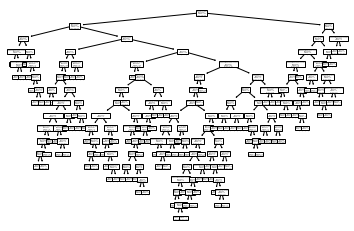

In [18]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

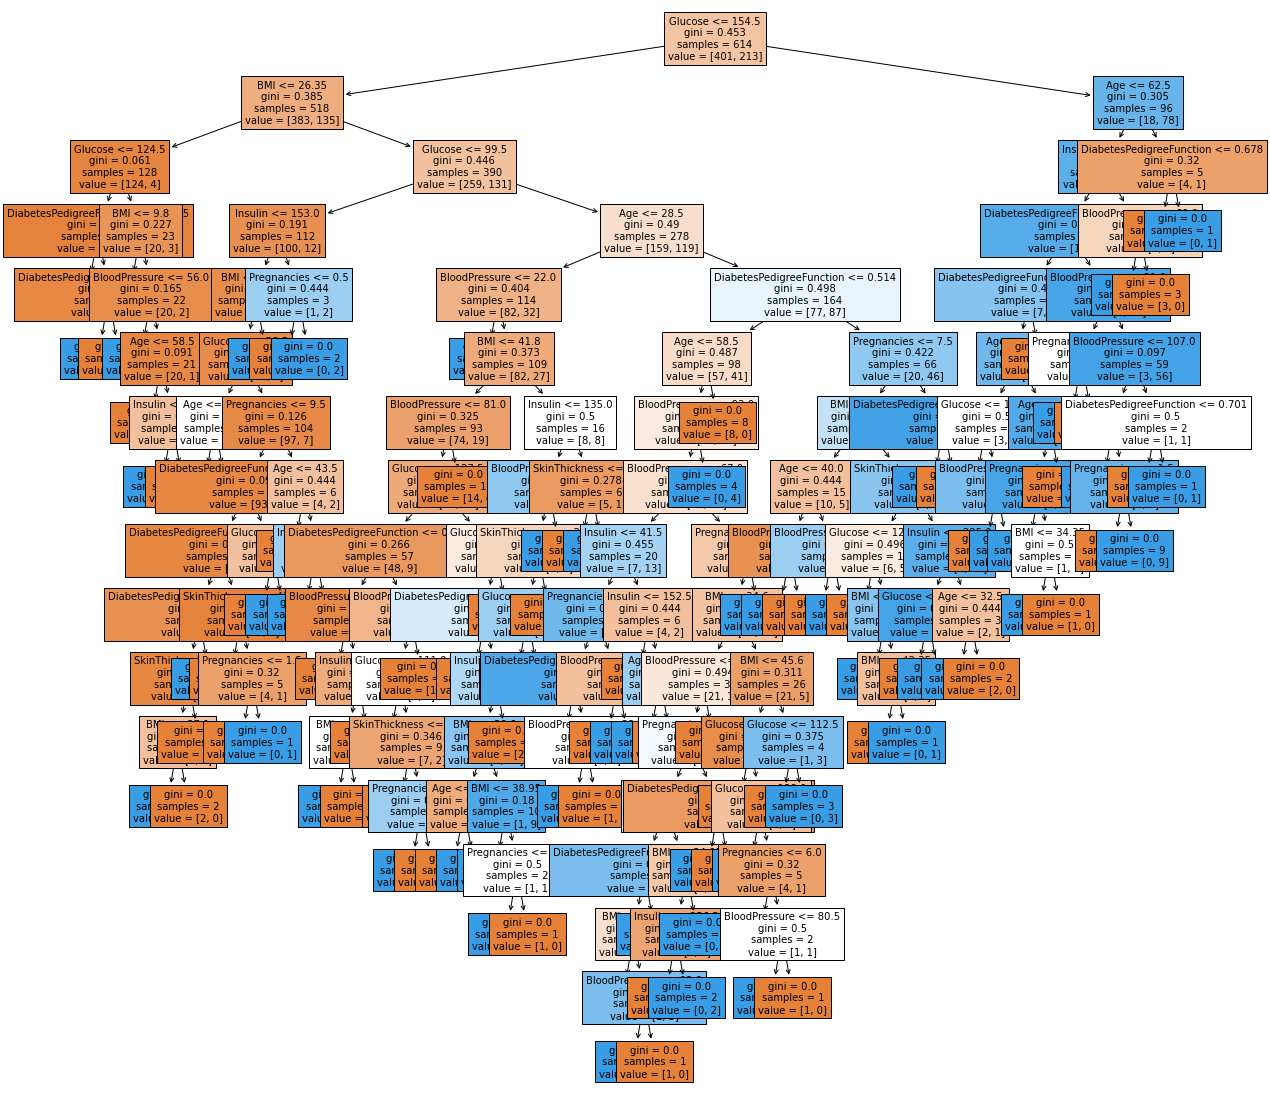

In [19]:
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

In [20]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)
# graphviz.Source(dot_tree)

In [41]:
# 피처의 중요도를 추출하기
model.feature_importances_

array([0.07405853, 0.31866584, 0.12971842, 0.02761105, 0.07769444,
       0.1640711 , 0.10311605, 0.10506456])

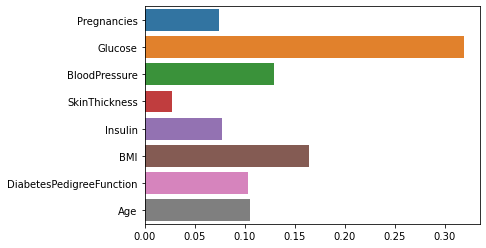

In [42]:
# 피처의 중요도 시각화하기
sns.barplot(x=model.feature_importances_, y=feature_names)

### 12. 정확도(Accuracy) 측정하기

In [60]:
# 다르게 예측한 개수
diff_count = abs(y_test - y_predict).sum()
diff_count

45

In [61]:
# 다르게 예측한 비율
diff_ratio = abs(y_test - y_predict).sum() / len(y_test)
diff_ratio

0.2922077922077922

In [65]:
# 예측의 정확도를 구한다.
print(1 - diff_ratio)
print((len(y_test)-diff_count)/len(y_test))

0.7077922077922079
0.7077922077922078


In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)*100

70.77922077922078

In [69]:
model.score(X_test, y_test)*100

70.77922077922078